<a href="https://colab.research.google.com/github/anaustinbeing/machine-learning/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np

In [83]:
data_austin = pd.read_csv('/content/student-por.csv', delimiter=';', header=0)

In [84]:
data_austin.shape

(649, 33)

In [85]:
data_austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Counting the number of categorical and numerical columns:

In [86]:
print('Categorical columns are: ', len(data_austin.select_dtypes('object').columns))
print('Numerical columns are: ', len(data_austin.select_dtypes('int64').columns))

Categorical columns are:  17
Numerical columns are:  16


Checking the missing values:

In [87]:
data_austin.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

We find that there are no missing values in any of the columns.

In [88]:
data_austin.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age           16.744222
Medu           2.514638
Fedu           2.306626
traveltime     1.568567
studytime      1.930663
failures       0.221880
famrel         3.930663
freetime       3.180277
goout          3.184900
Dalc           1.502311
Walc           2.280431
health         3.536210
absences       3.659476
G1            11.399076
G2            11.570108
G3            11.906009
dtype: float64

In [89]:
data_austin.min()

school             GP
sex                 F
age                15
address             R
famsize           GT3
Pstatus             A
Medu                0
Fedu                0
Mjob          at_home
Fjob          at_home
reason         course
guardian       father
traveltime          1
studytime           1
failures            0
schoolsup          no
famsup             no
paid               no
activities         no
nursery            no
higher             no
internet           no
romantic           no
famrel              1
freetime            1
goout               1
Dalc                1
Walc                1
health              1
absences            0
G1                  0
G2                  0
G3                  0
dtype: object

In [90]:
data_austin.max()

school                MS
sex                    M
age                   22
address                U
famsize              LE3
Pstatus                T
Medu                   4
Fedu                   4
Mjob             teacher
Fjob             teacher
reason        reputation
guardian           other
traveltime             4
studytime              4
failures               3
schoolsup            yes
famsup               yes
paid                 yes
activities           yes
nursery              yes
higher               yes
internet             yes
romantic             yes
famrel                 5
freetime               5
goout                  5
Dalc                   5
Walc                   5
health                 5
absences              32
G1                    19
G2                    19
G3                    19
dtype: object

In [91]:
data_austin.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age           17.0
Medu           2.0
Fedu           2.0
traveltime     1.0
studytime      2.0
failures       0.0
famrel         4.0
freetime       3.0
goout          3.0
Dalc           1.0
Walc           2.0
health         4.0
absences       2.0
G1            11.0
G2            11.0
G3            12.0
dtype: float64

In [92]:
data_austin.count()

school        649
sex           649
age           649
address       649
famsize       649
Pstatus       649
Medu          649
Fedu          649
Mjob          649
Fjob          649
reason        649
guardian      649
traveltime    649
studytime     649
failures      649
schoolsup     649
famsup        649
paid          649
activities    649
nursery       649
higher        649
internet      649
romantic      649
famrel        649
freetime      649
goout         649
Dalc          649
Walc          649
health        649
absences      649
G1            649
G2            649
G3            649
dtype: int64

1. e) Finding all the categorical values:

In [93]:
data_austin.select_dtypes(['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no
645,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,no,no,yes,yes,yes,no
646,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no
647,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no


3. Create a new target variable i.e. column name it pass_fristname, which will store the following per row:

a. 1 : if the total of G1, G2, G3 is greater or equal to 35

b. 0 : if the total of G1, G2, G3 is less than 35

In [94]:
data_austin['pass_austin'] = np.where(data_austin['G1'] + data_austin['G2'] + data_austin['G3'] >= 35, 1, 0)
data_austin['pass_austin']

0      0
1      0
2      1
3      1
4      1
      ..
644    0
645    1
646    0
647    0
648    0
Name: pass_austin, Length: 649, dtype: int64

4. Drop the columns G1, G2, G3 permanently

In [95]:
data_austin.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)
data_austin

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass_austin
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,0


In [96]:
# Separating target and feature columns
target_variable_austin = data_austin['pass_austin']
features_austin = data_austin.drop('pass_austin', axis=1)

In [97]:
# Total number of instances in each target class
target_variable_austin.value_counts()

1    328
0    321
Name: pass_austin, dtype: int64

We have 328 values for the class 1 and 321 values for the class 0. This is not a highly unbalanced dataset as the number of each values are almost same.

In [98]:
# Separating numeric and categorical feature columns
numeric_features_austin = features_austin.select_dtypes('int64').columns.tolist()
cat_features_austin = features_austin.select_dtypes('object').columns.tolist()

In [99]:
# Transforming categorical columns to numeric columns using OHE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer_austin = ColumnTransformer([
    ('ohe', OneHotEncoder(), cat_features_austin)
], remainder='passthrough', verbose_feature_names_out=False)  # remainder='passthrough' because we need to preserve the rest of the columns.
                                                              # verbose_feature_names_out=False to avoid appending the transformer name in the feature_names_out output.

In [100]:
# Preparing decision tree clasifier
from sklearn.tree import DecisionTreeClassifier
clf_austin = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [101]:
# Building pipeline
from sklearn.pipeline import Pipeline

pipeline_austin = Pipeline([
                            ('ohe_transformer', transformer_austin),
                            ('dt_classifier', clf_austin)
])

In [103]:
# Splitting dataset to 80-20 train-test splits
from sklearn.model_selection import train_test_split

X_train_austin, X_test_austin, y_train_austin, y_test_austin = train_test_split(features_austin, target_variable_austin, test_size=0.2, random_state=np.random.seed(83))

In [106]:
# Fitting training data to pipeline
x, y = pipeline_austin.fit(X_train_austin, y_train_austin)
X_train_austin_transformed = transformer_austin.fit_transform(X_train_austin)
X_test_austin_transformed = transformer_austin.fit_transform(X_test_austin)

In [104]:
# Performing cross validation with cv=10
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_austin, X_train_austin_transformed, y_train_austin, cv=10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(scores)

Scores: [0.61538462 0.65384615 0.67307692 0.65384615 0.73076923 0.59615385
 0.82692308 0.61538462 0.63461538 0.66666667]
Mean: 0.6666666666666667
Standard deviation: 0.06435846357954426


Visualizing the decision tree using Graphviz

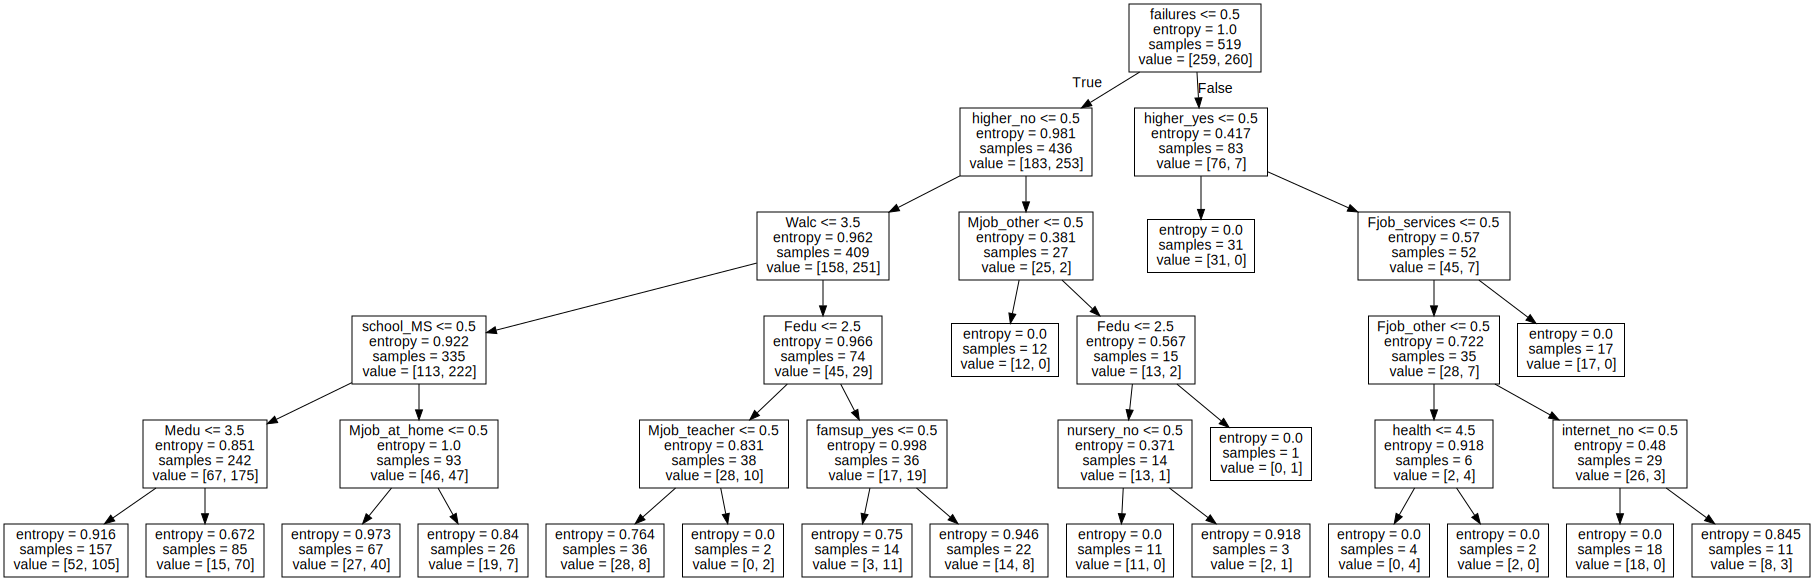

In [107]:
import graphviz
from sklearn import tree

columns = transformer_austin.get_feature_names_out()
dot_data = tree.export_graphviz(clf_austin, max_depth=5, feature_names=columns)
graph = graphviz.Source(dot_data)
graph.render('pima')
graph.save('austinjoyal_decisiontree.dot')
graph

In [108]:
# Accuracy score of training and testing samples
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

print(f'Training accuracy score: {clf_austin.score(X_train_austin_transformed, y_train_austin)}')
print(f'Testing accuracy score: {clf_austin.score(X_test_austin_transformed, y_test_austin)}')

print('\nOn TEST data:\n')
y_test_pred = clf_austin.predict(X_test_austin_transformed)
print('Accuracy score: ', accuracy_score(y_test_austin, y_test_pred))
print('Recall: ', recall_score(y_test_austin, y_test_pred))
print('Precision: ', precision_score(y_test_austin, y_test_pred))
print('Confusion matrix:\n', confusion_matrix(y_test_austin, y_test_pred))

Training accuracy score: 0.7610789980732178
Testing accuracy score: 0.7307692307692307

On TEST data:

Accuracy score:  0.7307692307692307
Recall:  0.8382352941176471
Precision:  0.7037037037037037
Confusion matrix:
 [[38 24]
 [11 57]]


We find that accuracy is 76.1% on the training set and 72.3% on the testing set.

**Fine Tuning**

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

parameters = {
    'dt_classifier__min_samples_split' : range(10,300,20),
    'dt_classifier__max_depth': range(1,30,2),
    'dt_classifier__min_samples_leaf':range(1,15,3)
}

rnd_search = RandomizedSearchCV(pipeline_austin, param_distributions=parameters, scoring='accuracy', cv=5, n_iter=7, refit=True, verbose=3)
# print(type(X_train_austin), type(y_train_austin))
rnd_search.fit(X_train_austin, y_train_austin)
best_model = rnd_search.best_estimator_
print(f'Best parameters: {rnd_search.best_params_}')
print(f'Score: {rnd_search.best_score_}')
print(f'Best estimator: {best_model}')

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END dt_classifier__max_depth=19, dt_classifier__min_samples_leaf=4, dt_classifier__min_samples_split=130;, score=0.615 total time=   0.0s
[CV 2/5] END dt_classifier__max_depth=19, dt_classifier__min_samples_leaf=4, dt_classifier__min_samples_split=130;, score=0.683 total time=   0.0s
[CV 3/5] END dt_classifier__max_depth=19, dt_classifier__min_samples_leaf=4, dt_classifier__min_samples_split=130;, score=0.635 total time=   0.0s
[CV 4/5] END dt_classifier__max_depth=19, dt_classifier__min_samples_leaf=4, dt_classifier__min_samples_split=130;, score=0.712 total time=   0.0s
[CV 5/5] END dt_classifier__max_depth=19, dt_classifier__min_samples_leaf=4, dt_classifier__min_samples_split=130;, score=0.689 total time=   0.0s
[CV 1/5] END dt_classifier__max_depth=3, dt_classifier__min_samples_leaf=10, dt_classifier__min_samples_split=250;, score=0.663 total time=   0.0s
[CV 2/5] END dt_classifier__max_depth=3, dt_classifier__mi

In [110]:
y_test_pred = best_model.predict(X_test_austin)
print('Accuracy score: ', accuracy_score(y_test_austin, y_test_pred))
print('Recall: ', recall_score(y_test_austin, y_test_pred))
print('Precision: ', precision_score(y_test_austin, y_test_pred))
print('Confusion matrix:\n', confusion_matrix(y_test_austin, y_test_pred))

Accuracy score:  0.7384615384615385
Recall:  0.8529411764705882
Precision:  0.7073170731707317
Confusion matrix:
 [[38 24]
 [10 58]]


Saving the model

In [111]:
import joblib

joblib.dump(best_model, "model.pkl")
joblib.dump(pipeline_austin, "full_pipeline.pkl")

['full_pipeline.pkl']